In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
from matplotlib.colors import LogNorm
import os
os.chdir("../from_EC/modified_from_EC")
%aimport kinetics_analysis
os.chdir("../../notebooks")

# Preparing filtered data

In [4]:
# All activities from EC's demultixed UMI calcuations
concatenated_df = pd.read_csv("../from_EC/20250226_TREBL_MAZ06/demultiplexed_counts.csv")
concatenated_df["Time"] = concatenated_df["Library"].str.split("_").str[1]
concatenated_df["sample"] = concatenated_df["Library"].str.split("_").str[0]
concatenated_df = concatenated_df.rename(columns={"Ratio_negctrlnorm": "Ratio_negCTRLnorm",
    "UMIs_RPTR": "RPTR_UMIs",
    "UMIs_AD": "AD_UMIs"})
concatenated_df

,Barcode_RPTR,RPTR_UMIs,Reads_RPTR,RPTR_BC,AD,AD_BC,AD_ADBC,Barcode_AD,Tile,AD_UMIs,Reads_AD,Ratio,Ratio_negCTRLnorm,Library,Time,sample
0,TATACATCCACCAT,402,25490.0,TATACATCCACCAT,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,646,7557.0,0.622291,5.651387,3_5,5,3
1,AAGTGGTGAGAAGC,2784,167960.0,AAGTGGTGAGAAGC,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,806,9306.0,3.454094,31.368640,3_5,5,3
2,GTACGAAGTCAGTG,1349,79520.0,GTACGAAGTCAGTG,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,657,7982.0,2.053272,18.646962,3_5,5,3
3,CTATTCCGAAATAT,1012,66011.0,CTATTCCGAAATAT,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,167,2170.0,6.059880,55.033299,3_5,5,3
4,AAAGTTCTCAGACA,690,41207.0,AAAGTTCTCAGACA,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,917,11109.0,0.752454,6.833470,3_5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347306,TTCAGAGAAAGCGC,13,254.0,TTCAGAGAAAGCGC,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,57,416.0,0.228070,0.575070,1_240,240,1
347307,AAATCAGGTGCGCT,3,84.0,AAATCAGGTGCGCT,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,53,414.0,0.056604,0.142724,1_240,240,1
347308,AATAAATTGTTATG,1,32.0,AATAAATTGTTATG,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,313,2896.0,0.003195,0.008056,1_240,240,1
347309,ATAAAACTAGCCTG,1,22.0,ATAAAACTAGCCTG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,536,4436.0,0.001866,0.004704,1_240,240,1


In [5]:
# Only keep tiles which at least in at least two time points and samples
tile_time_sample_counts = concatenated_df.groupby('Tile')['sample'].nunique()
valid_tiles = tile_time_sample_counts[tile_time_sample_counts>1].index
filtered_cat_1 = concatenated_df[concatenated_df['Tile'].isin(valid_tiles)]
filtered_cat_1

,Barcode_RPTR,RPTR_UMIs,Reads_RPTR,RPTR_BC,AD,AD_BC,AD_ADBC,Barcode_AD,Tile,AD_UMIs,Reads_AD,Ratio,Ratio_negCTRLnorm,Library,Time,sample
0,TATACATCCACCAT,402,25490.0,TATACATCCACCAT,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,646,7557.0,0.622291,5.651387,3_5,5,3
1,AAGTGGTGAGAAGC,2784,167960.0,AAGTGGTGAGAAGC,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,806,9306.0,3.454094,31.368640,3_5,5,3
2,GTACGAAGTCAGTG,1349,79520.0,GTACGAAGTCAGTG,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,657,7982.0,2.053272,18.646962,3_5,5,3
3,CTATTCCGAAATAT,1012,66011.0,CTATTCCGAAATAT,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,167,2170.0,6.059880,55.033299,3_5,5,3
4,AAAGTTCTCAGACA,690,41207.0,AAAGTTCTCAGACA,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,917,11109.0,0.752454,6.833470,3_5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347306,TTCAGAGAAAGCGC,13,254.0,TTCAGAGAAAGCGC,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,57,416.0,0.228070,0.575070,1_240,240,1
347307,AAATCAGGTGCGCT,3,84.0,AAATCAGGTGCGCT,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,53,414.0,0.056604,0.142724,1_240,240,1
347308,AATAAATTGTTATG,1,32.0,AATAAATTGTTATG,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,313,2896.0,0.003195,0.008056,1_240,240,1
347309,ATAAAACTAGCCTG,1,22.0,ATAAAACTAGCCTG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,536,4436.0,0.001866,0.004704,1_240,240,1


In [6]:
# Remove outliers within each sample
filtered_cat_2 = kinetics_analysis.remove_outliers_faster(filtered_cat_1, ['sample', 'Tile', 'Time'], 'Ratio_negCTRLnorm')
filtered_cat_2

,Barcode_RPTR,RPTR_UMIs,Reads_RPTR,RPTR_BC,AD,AD_BC,AD_ADBC,Barcode_AD,Tile,AD_UMIs,Reads_AD,Ratio,Ratio_negCTRLnorm,Library,Time,sample
0,TATACATCCACCAT,402,25490.0,TATACATCCACCAT,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,646,7557.0,0.622291,5.651387,3_5,5,3
1,AAGTGGTGAGAAGC,2784,167960.0,AAGTGGTGAGAAGC,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,806,9306.0,3.454094,31.368640,3_5,5,3
2,GTACGAAGTCAGTG,1349,79520.0,GTACGAAGTCAGTG,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,657,7982.0,2.053272,18.646962,3_5,5,3
3,CTATTCCGAAATAT,1012,66011.0,CTATTCCGAAATAT,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,167,2170.0,6.059880,55.033299,3_5,5,3
4,AAAGTTCTCAGACA,690,41207.0,AAAGTTCTCAGACA,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,917,11109.0,0.752454,6.833470,3_5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347119,TTCAGAGAAAGCGC,13,254.0,TTCAGAGAAAGCGC,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,57,416.0,0.228070,0.575070,1_240,240,1
347120,AAATCAGGTGCGCT,3,84.0,AAATCAGGTGCGCT,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,53,414.0,0.056604,0.142724,1_240,240,1
347121,AATAAATTGTTATG,1,32.0,AATAAATTGTTATG,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,313,2896.0,0.003195,0.008056,1_240,240,1
347122,ATAAAACTAGCCTG,1,22.0,ATAAAACTAGCCTG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,536,4436.0,0.001866,0.004704,1_240,240,1


In [7]:
# Compute sample-level means -- across all BCs
sample_means_cat = filtered_cat_2.groupby(['Tile', 'Time', 'sample'])['Ratio_negCTRLnorm'].mean().reset_index()
sample_means_cat

,Tile,Time,sample,Ratio_negCTRLnorm
0,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,1,1.582093
1,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,2,0.921957
2,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,3,1.258584
3,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,1,1.289787
4,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,2,1.002675
...,...,...,...,...
230937,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,2,7.493609
230938,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,3,8.934322
230939,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,5,1,7.713425
230940,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,5,2,4.285752


In [8]:
# Compute standard deviation across 3 sample means
std_devs_cat = sample_means_cat.groupby(['Tile', 'Time'])['Ratio_negCTRLnorm'].std().unstack(level='Time')
std_devs_cat

Time,0,10,15,180,240,30,5
Tile,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,0.330090,0.203824,0.496080,0.055946,0.522002,0.858328,0.551313
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,0.110441,0.499625,0.412843,0.584507,0.174427,0.008280,0.705516
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,0.292430,0.010140,0.320101,0.155198,0.122804,0.233617,0.750194
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,2.039598,0.728617,0.746311,0.135646,0.879244,1.948277,0.392088
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.147264,0.758131,0.256276,0.210639,0.221155,0.650056,0.529351
...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,0.142995,1.343837,2.561246,2.592146,1.845654,5.801335,1.908044
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,0.790555,3.100196,2.623520,7.610656,3.936901,14.265229,10.191587
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,0.522777,1.168326,1.759513,4.446913,2.970720,8.604516,1.460482


In [9]:
# Compute the mean across BCs and samples (not just raw mean)
final_means_cat = sample_means_cat.groupby(['Tile', 'Time'])['Ratio_negCTRLnorm'].mean().unstack(level='Time')
final_means_cat

Time,0,10,15,180,240,30,5
Tile,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.062693,1.532920,1.240728,1.206545,1.787659,1.351119
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,1.819540,1.700459,2.317024,2.080985,1.885667,2.077828
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.000460,0.730895,0.709995,0.732983,0.797948,1.621634
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,1.299895,1.467031,1.668606,1.693269,1.947597,0.934068
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,1.127691,1.071415,1.504457,1.322705,1.427080,0.959878
...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,14.324264,20.019784,19.689651,12.861237,42.340589,6.746955


In [10]:
# Difference between score at t=0 and Vmax must be at least 5: means active
filtered_final_means_cat = kinetics_analysis.filter_by_maximum_threshold(final_means_cat).dropna()
filtered_final_means_cat["Activity"] = "active"
filtered_final_means_cat

Time,0,10,15,180,240,30,5,Activity
Tile,,,,,,,,
AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATTTGCCACCACCAAATATGAGATTGCAACCACATGCTGAATTGGATTTGTTGGACTTTGCTACATTTGATGGTGGT,0.729149,5.794430,6.832395,7.872477,4.974632,12.941360,2.400326,active
AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTGGTTTGCCATCTGGTACTGTTTCTCCAACTGATTTGATGTTGGATGCTTCTGCTCCATCTTCTGCTACATTTACT,2.521581,21.738648,29.841027,17.966665,13.429892,54.876878,12.081788,active
AAACAATTTCAGAATTATCAAAGAAGAAGATTGATGTCTCAATCTAATTTGATTCAAGGTTTGGAAATGTCTGACTTCTTTAATGATATTCCATCTCATCCATTTGGTAATGACTTTGAT,1.957038,6.178987,9.341038,11.904372,9.808035,15.666855,4.141078,active
AAACATGCTGATATGGATTTGTTTGATGAATTTACTGCATTTGAAGGTGGTGCTTCTACTACTCAGAATGCATTTCCATCTGCTTATTCTTCTCCAGCTGTTCCAACTATTTATGATCCA,0.735624,8.889710,11.602415,12.913788,8.601112,29.655114,5.256059,active
AAACCAGAAATTATTGGTGAATTGTCTTGTCATTTGCCAACTGCTGGTGCTCATGTTACTGGTGAACCAGATCATTCTCCAATTTCTGTTCATACTGATGTCTTGGATTCTGTCTTCTCT,1.254759,5.638187,6.199079,8.506463,6.853283,6.350312,3.328503,active
...,...,...,...,...,...,...,...,...
TTTGTTAAATCTTTGAAAGGTAGGAAACCATTGACTGGTGTTGCTTTGGGTATTTATTCTTATGAAGTTAGATCTAAGACTGATAATTCTTTGAATTTGAGAATCTTGACTTTGCATACT,1.070978,8.822356,5.450700,11.479959,9.325870,35.162836,3.340094,active
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349,active
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106,active


In [11]:
final_means_cat['Vmax'] = final_means_cat[["0", "10", "15", "180", "240", "30", "5"]].max(axis=1)
final_means_cat['Avg_StdDev'] = std_devs_cat.loc[final_means_cat.index].mean(axis=1)
final_means_cat = pd.merge(final_means_cat.reset_index(), filtered_final_means_cat.reset_index(), how = 'left').set_index("Tile")
final_means_cat["Activity"] = final_means_cat["Activity"].fillna("inactive")
final_means_cat

Time,0,10,15,180,240,30,5,Vmax,Avg_StdDev,Activity
Tile,,,,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.062693,1.532920,1.240728,1.206545,1.787659,1.351119,1.787659,0.431083,inactive
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,1.819540,1.700459,2.317024,2.080985,1.885667,2.077828,2.317024,0.356520,inactive
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.000460,0.730895,0.709995,0.732983,0.797948,1.621634,1.621634,0.269212,inactive
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,1.299895,1.467031,1.668606,1.693269,1.947597,0.934068,1.984682,0.981397,inactive
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,1.127691,1.071415,1.504457,1.322705,1.427080,0.959878,1.504457,0.396125,inactive
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349,38.055564,2.313608,active
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106,73.708402,6.074092,active
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,14.324264,20.019784,19.689651,12.861237,42.340589,6.746955,42.340589,2.990464,active


In [12]:
final_means_cat = final_means_cat.dropna()
final_means_cat

Time,0,10,15,180,240,30,5,Vmax,Avg_StdDev,Activity
Tile,,,,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.062693,1.532920,1.240728,1.206545,1.787659,1.351119,1.787659,0.431083,inactive
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,1.819540,1.700459,2.317024,2.080985,1.885667,2.077828,2.317024,0.356520,inactive
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.000460,0.730895,0.709995,0.732983,0.797948,1.621634,1.621634,0.269212,inactive
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,1.299895,1.467031,1.668606,1.693269,1.947597,0.934068,1.984682,0.981397,inactive
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,1.127691,1.071415,1.504457,1.322705,1.427080,0.959878,1.504457,0.396125,inactive
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349,38.055564,2.313608,active
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106,73.708402,6.074092,active
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,14.324264,20.019784,19.689651,12.861237,42.340589,6.746955,42.340589,2.990464,active


# Figure 7: Sort-seq vs TREBL-seq

In [13]:
# read in facs csv with activity data and control designation (EC did by hand in excel)
facs_f='/global/scratch/projects/fc_mvslab/OpenProjects/EChase/TREBLEseq_ismaybethenewcibername/TREBLseq_finaldrafts/Gcn4OrthologData_ToShare_20240930_EC.csv'
facsdf_qc = pd.read_csv(facs_f, usecols=['Name','ArrayDNA','is_control',
                                         'Activity_SCglucose', 'TotalReads_BioRepA_BYS4', 'TotalReads_BioRepB_BYS4',
                                         'BioRep_A_mCherry','BioRep_A_mCherry_TotalReads','BioRep_B_mCherry','BioRep_B_mCherry_TotalReads', #mCherry 4 bin sorts
                                        'BioRep_A_GFP', 'BioRep_A_GFP_TotalReads','BioRep_B_GFP', 'BioRep_B_GFP_TotalReads', #GFP 4 bin sorts -- one of the replicates is very messed up
                                        ])
facsdf_qc['GFP_mean']=facsdf_qc[['BioRep_A_GFP','BioRep_B_GFP']].mean(axis=1)
facsdf_qc['mCherry_mean']=facsdf_qc[['BioRep_A_mCherry','BioRep_B_mCherry']].mean(axis=1)
facsdf_qc = facsdf_qc[(
    facsdf_qc['BioRep_A_mCherry_TotalReads']>=50) & (facsdf_qc['BioRep_B_mCherry_TotalReads']>=50) &(
        facsdf_qc['BioRep_A_GFP_TotalReads']>=50) & (facsdf_qc['BioRep_B_GFP_TotalReads']>=50)
    ]
facsdf_qc = facsdf_qc[(facsdf_qc['TotalReads_BioRepA_BYS4']>=1000) & (facsdf_qc['TotalReads_BioRepB_BYS4']>=1000) ]
facsdf_qc

,Name,is_control,ArrayDNA,TotalReads_BioRepA_BYS4,TotalReads_BioRepB_BYS4,BioRep_A_GFP_TotalReads,BioRep_A_GFP,BioRep_B_GFP_TotalReads,BioRep_B_GFP,BioRep_A_mCherry_TotalReads,BioRep_A_mCherry,BioRep_B_mCherry_TotalReads,BioRep_B_mCherry,Activity_SCglucose,GFP_mean,mCherry_mean
7,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_36,experimental,GCTTCTGGTCAAGCTAATGCTAATTATCAAGCATTTACTGCTGGTT...,37745.0,27242.0,555.0,1069.575624,294.0,256.000000,1301.0,1914.455499,819.0,2495.171715,31637.986095,662.787812,2204.813607
8,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_41,experimental,AATGCTAATTATCAAGCATTTACTGCTGGTTCTGCTTTGAATGGTC...,54447.0,34378.0,521.0,648.717628,569.0,268.428420,2706.0,1863.229267,716.0,1873.407563,35182.012737,458.573024,1868.318415
9,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_46,experimental,GCATTTACTGCTGGTTCTGCTTTGAATGGTCCATCTTTGCCAGCTC...,53756.0,5256.0,784.0,1186.811484,64.0,256.000000,2109.0,1028.931403,80.0,855.631328,65569.941168,721.405742,942.281366
10,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_51,experimental,TCTGCTTTGAATGGTCCATCTTTGCCAGCTCCATCTTTGTTTGCTG...,6275.0,86566.0,58.0,2912.584135,1438.0,598.087653,333.0,596.539632,4863.0,1520.385633,41694.074991,1755.335894,1058.462632
11,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_56,experimental,CCATCTTTGCCAGCTCCATCTTTGTTTGCTGGTCATGGTCCAGAAG...,19935.0,4774.0,479.0,361.582465,141.0,256.000000,1673.0,3213.641420,524.0,3169.107634,18947.873984,308.791233,3191.374527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20813,Gnc4Lib_Disorder_HIGH_0,high,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,3225.0,23456.0,414.0,8782.000000,2446.0,9064.000000,94.0,1664.822094,479.0,1331.972632,261410.705323,8923.000000,1498.397363
20814,Gnc4Lib_Disorder_HIGH_0,high,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...,64713.0,46036.0,10295.0,4506.455793,8034.0,5156.528478,2549.0,3124.915008,1258.0,2875.423105,152798.870307,4831.492136,3000.169056
20818,Gnc4Lib_Charge_HIGH_0,mid,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,4430.0,53110.0,452.0,3363.151895,7755.0,3243.398807,124.0,1860.267447,2115.0,1947.655400,113197.558297,3303.275351,1903.961424
20820,Gnc4Lib_Disorder_HIGH_0,high,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,3225.0,23456.0,414.0,8782.000000,2446.0,9064.000000,94.0,1664.822094,479.0,1331.972632,261410.705323,8923.000000,1498.397363


In [14]:
# inner join the df's 
qcdf = pd.merge(concatenated_df[['Tile', 'AD_BC', 'RPTR_BC', 
                                 'RPTR_UMIs', 'AD_UMIs',
                                 'Ratio_negCTRLnorm', 'Time','sample'
                                ]], 
                facsdf_qc[['Name', 'ArrayDNA', 'is_control',
                                           'GFP_mean', 'mCherry_mean', 'Activity_SCglucose']],
                   left_on = 'Tile', right_on = 'ArrayDNA',
                   how= 'inner')
qcdf = qcdf.drop(columns=['ArrayDNA', ])
qcdf.head()

,Tile,AD_BC,RPTR_BC,RPTR_UMIs,AD_UMIs,Ratio_negCTRLnorm,Time,sample,Name,is_control,GFP_mean,mCherry_mean,Activity_SCglucose
0,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,TATACATCCACCAT,402,646,5.651387,5,3,Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_256,experimental,2550.414931,3813.713778,71546.924661
1,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,CTATTCCGAAATAT,1012,167,55.033299,5,3,Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_296,experimental,8798.171241,1017.694945,261940.998463
2,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,AAAGTTCTCAGACA,690,917,6.833470,5,3,Sordariomycetes_jgi|Colac2|683025|estExt_Genew...,experimental,3248.307011,2321.034628,102890.752186
3,CAAAGACCAACTAGACCACAAGTTCCATTGTTCTCTCAATCTACTG...,GCCCTTGTATT,TTAGTATTTTATCT,140,533,2.385406,5,3,Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...,experimental,1762.120378,2637.450831,46665.516224
4,TTGTTTATGGATGCTTCTGCTCCACCATCTGCTTCATTTACTGATT...,GCTCGTTACCG,AAAAACTAATTCTA,459,111,37.553569,5,3,Eurotiomycetes_jgi|Aspind2_1|119317|CE119316_2...,experimental,5148.434170,2383.548911,161936.816547


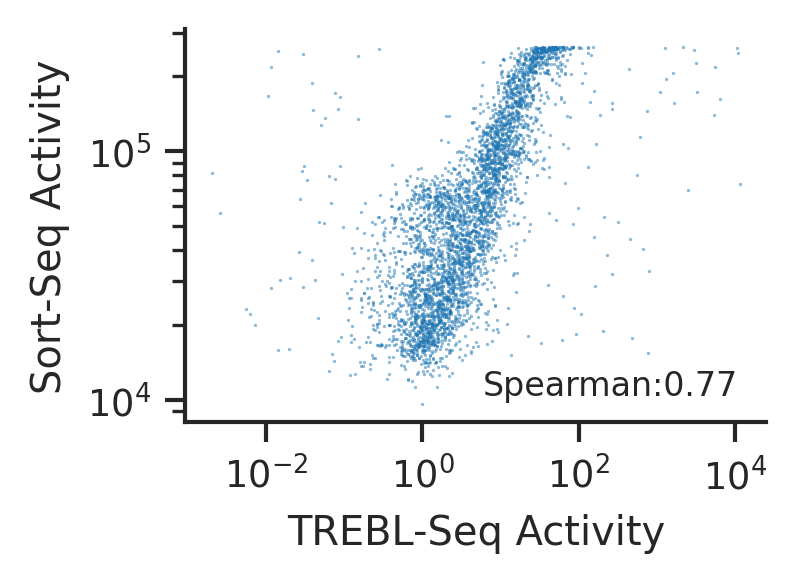

In [15]:
sns.set_context('paper')
sns.set_style('ticks')

qcdf_240 = qcdf[(qcdf['Time']=='180')] # Choose time point 180
qcdf_240 = qcdf_240[["Tile", "Ratio_negCTRLnorm", "Activity_SCglucose"]].groupby("Tile").mean() # Average across replicates

plt.figure(dpi = 300, figsize = (2.5, 1.7))
ax = sns.scatterplot(
    data=qcdf_240,
    x='Ratio_negCTRLnorm',
    y='Activity_SCglucose',
    edgecolor=None,
    alpha=0.5,
    s=0.5
)
ax.set(xscale="log")
ax.set(yscale="log")

ax.set_xlabel("TREBL-Seq Activity")
ax.set_ylabel("Sort-Seq Activity")
sns.despine()

# Compute correlations
pearson_corr, pearson_p = pearsonr(qcdf_240['Ratio_negCTRLnorm'], qcdf_240['Activity_SCglucose'])
spearman_corr, spearman_p = spearmanr(qcdf_240['Ratio_negCTRLnorm'], qcdf_240['Activity_SCglucose'])

# Annotate in bottom-right corner without a box
textstr = f'Spearman:{spearman_corr:.2f}'
ax.text(
    0.95, 0.05, textstr, transform=ax.transAxes,
    fontsize='small', verticalalignment='bottom', horizontalalignment='right'
)
plt.savefig("../output/grant_resub_figs_v2/fig7.png", dpi=300, bbox_inches="tight")
plt.show()


# Figure 4: Replicates

In [16]:
# Pivot data to have replicates + BCs + times as columns
df_pivot = concatenated_df.pivot_table(
    index=['Tile', 'Time', "AD_BC", "RPTR_BC"],
    columns='sample',
    values='Ratio_negCTRLnorm'
).reset_index().dropna()

df_pivot

sample,Tile,Time,AD_BC,RPTR_BC,1,2,3
0,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,ACCCCTCGCCG,AGTTCATGCTCCGA,1.582093,0.921957,1.258584
1,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,ACCCCTCGCCG,AGTTCATGCTCCGA,1.289787,1.002675,0.895616
2,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,15,ACCCCTCGCCG,AGTTCATGCTCCGA,1.128625,1.383635,2.086499
3,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,180,ACCCCTCGCCG,AGTTCATGCTCCGA,1.220173,1.304044,1.197968
4,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,240,ACCCCTCGCCG,AGTTCATGCTCCGA,0.750743,1.092876,1.776015
...,...,...,...,...,...,...,...
119386,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,180,ACCCATCCAGA,AAATATTTGTCCGC,6.843205,6.148755,4.277445
119387,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,240,AATTGAGCGAT,GTCAAGATACCTCG,0.021459,0.009570,0.005575
119388,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,240,ACCCATCCAGA,AAATATTTGTCCGC,4.407703,4.125089,3.036959
119390,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,ACCCATCCAGA,AAATATTTGTCCGC,14.707832,14.934920,17.790890


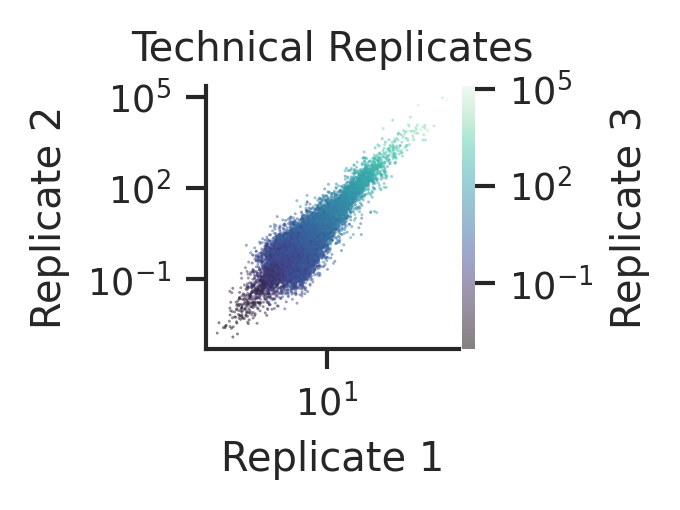

In [17]:
sns.set_context('paper')

x = df_pivot['1']
y = df_pivot['2']
c = df_pivot['3']

plt.figure(figsize=(2,1.5), dpi=300)
hb = plt.scatter(
    x, y, c=c, cmap='mako', s=0.5, alpha=0.5, norm=LogNorm(vmin=c.min(), vmax=c.max()), edgecolors='none'
)

plt.title("Technical Replicates")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Replicate 1')
plt.ylabel('Replicate 2')
sns.despine()

# Create colorbar and customize
cbar = plt.colorbar(hb, pad = 0.01)
cbar.set_label('Replicate 3')  # rotation 0, labelpad adjusts distance
cbar.outline.set_visible(False)

plt.savefig("../output/grant_resub_figs/fig4_option_1.png", dpi=300, bbox_inches="tight")
plt.tight_layout(pad = 0)
plt.show()


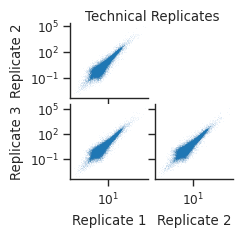

In [18]:
# Rename columns for labeling
df_plot = df_pivot[["1", "2", "3"]].rename(columns={
    "1": "Replicate 1",
    "2": "Replicate 2",
    "3": "Replicate 3"
})

sns.set_context('paper')

# Create PairGrid manually
g = sns.PairGrid(df_plot, corner=True, height=1, aspect=1)

# Map scatterplots to lower triangle
g.map_lower(sns.scatterplot, s=0.25, alpha=0.1, edgecolor=None)

# Set log scale for all lower-triangle axes
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xscale('log')
        ax.set_yscale('log')

# Hide diagonal axes
for i, j in zip(*np.diag_indices_from(g.axes)):
    g.axes[i, j].set_visible(False)

# Add a title
g.fig.suptitle("Technical Replicates", fontsize='medium', y = 0.725, x = 0.45)

# Adjust layout
g.fig.tight_layout(pad=0)
g.fig.savefig("../output/grant_resub_figs/fig4_option_2.png", dpi=300, bbox_inches="tight")

plt.show()


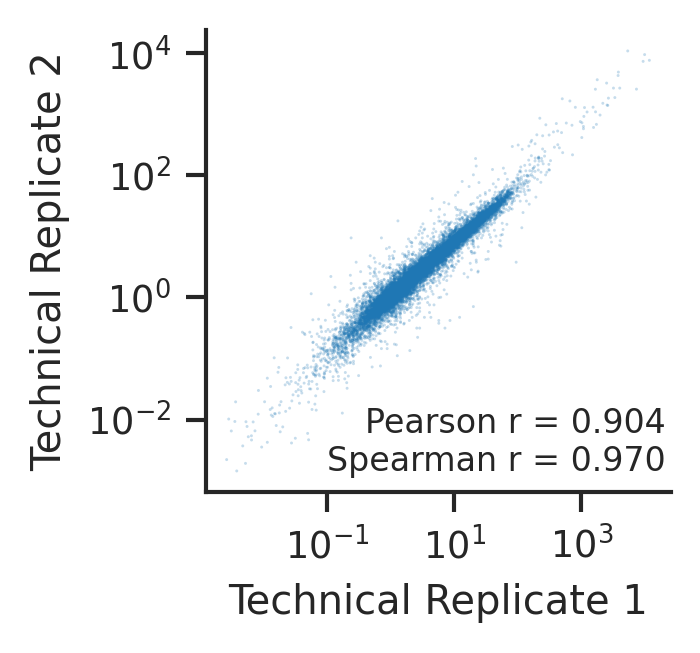

In [19]:
# Subset
df_pivot_180 = df_pivot[df_pivot["Time"] == "180"]

x = df_pivot_180["2"].to_numpy()
y = df_pivot_180["3"].to_numpy()

# Compute correlations
pearson_r, pearson_p = pearsonr(x, y)
spearman_r, spearman_p = spearmanr(x, y)

# Plot
sns.set_context('paper')
plt.figure(figsize=(2,2), dpi=300)
sns.scatterplot(data=df_pivot_180, x='2', y='3',
                edgecolor='none', alpha=0.25, s=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Technical Replicate 1")
plt.ylabel("Technical Replicate 2")
sns.despine()

# Annotate with r values
plt.text(0.99, 0.03,
         f"Pearson r = {pearson_r:.3f}\nSpearman r = {spearman_r:.3f}",
         ha='right', va='bottom',
         transform=plt.gca().transAxes,
         fontsize='small')

plt.savefig("../output/grant_resub_figs_v2/fig4.png", bbox_inches='tight')

# Figure 5: Multiple BCs

In [20]:
filtered_cat_2

,Barcode_RPTR,RPTR_UMIs,Reads_RPTR,RPTR_BC,AD,AD_BC,AD_ADBC,Barcode_AD,Tile,AD_UMIs,Reads_AD,Ratio,Ratio_negCTRLnorm,Library,Time,sample
0,TATACATCCACCAT,402,25490.0,TATACATCCACCAT,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,646,7557.0,0.622291,5.651387,3_5,5,3
1,AAGTGGTGAGAAGC,2784,167960.0,AAGTGGTGAGAAGC,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,806,9306.0,3.454094,31.368640,3_5,5,3
2,GTACGAAGTCAGTG,1349,79520.0,GTACGAAGTCAGTG,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,657,7982.0,2.053272,18.646962,3_5,5,3
3,CTATTCCGAAATAT,1012,66011.0,CTATTCCGAAATAT,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,167,2170.0,6.059880,55.033299,3_5,5,3
4,AAAGTTCTCAGACA,690,41207.0,AAAGTTCTCAGACA,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,917,11109.0,0.752454,6.833470,3_5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347119,TTCAGAGAAAGCGC,13,254.0,TTCAGAGAAAGCGC,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,57,416.0,0.228070,0.575070,1_240,240,1
347120,AAATCAGGTGCGCT,3,84.0,AAATCAGGTGCGCT,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,53,414.0,0.056604,0.142724,1_240,240,1
347121,AATAAATTGTTATG,1,32.0,AATAAATTGTTATG,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,313,2896.0,0.003195,0.008056,1_240,240,1
347122,ATAAAACTAGCCTG,1,22.0,ATAAAACTAGCCTG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,536,4436.0,0.001866,0.004704,1_240,240,1


In [21]:
# Per AD timepoint and sample, what is the standard deviation between AD BCs?
AD_BCs_agg = concatenated_df[["AD", "Ratio_negCTRLnorm", "Time", "sample"]].groupby(["AD", "Time", "sample"]).agg([np.mean, np.std, "count"]).reset_index()#.dropna()
AD_BCs_agg.columns = ["AD", "Time", "sample", "mean", "std", "BC_count"]
AD_BCs_agg["Relative Std. Dev."] = AD_BCs_agg["std"] / AD_BCs_agg["mean"]
AD_BCs_agg = AD_BCs_agg[AD_BCs_agg["AD"].isin(filtered_cat_2["AD"])] # Remove outliers
AD_BCs_agg

,AD,Time,sample,mean,std,BC_count,Relative Std. Dev.
0,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,1,1.582093,NaN,1,NaN
1,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,2,0.921957,NaN,1,NaN
2,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,3,1.258584,NaN,1,NaN
3,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,1,1.289787,NaN,1,NaN
4,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,2,1.002675,NaN,1,NaN
...,...,...,...,...,...,...,...
231124,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,2,7.493609,10.523603,2,1.404344
231125,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,3,8.934322,12.525078,2,1.401906
231126,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,5,1,7.713425,NaN,1,NaN
231127,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,5,2,4.285752,NaN,1,NaN


In [22]:
# 37% of set has multiple BCs
len(AD_BCs_agg[AD_BCs_agg["Relative Std. Dev."].isna()]) / len(AD_BCs_agg)

0.6355232049605528

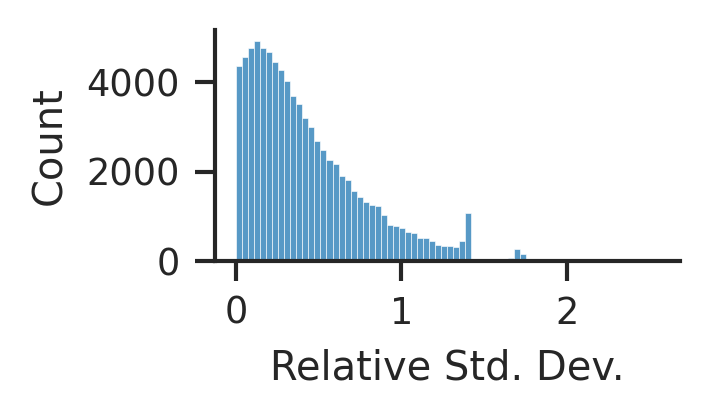

In [23]:
# For ADs with multiple BCs
plt.figure(dpi = 300, figsize = (2,1))
ax = sns.histplot(AD_BCs_agg['Relative Std. Dev.'], bins = 70)
sns.despine()

In [24]:
from Bio.Seq import Seq
qcdf["AAseq"] = qcdf["Tile"].apply(lambda seq: str(Seq(seq).translate()))
qcdf

,Tile,AD_BC,RPTR_BC,RPTR_UMIs,AD_UMIs,Ratio_negCTRLnorm,Time,sample,Name,is_control,GFP_mean,mCherry_mean,Activity_SCglucose,AAseq
0,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,TATACATCCACCAT,402,646,5.651387,5,3,Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_256,experimental,2550.414931,3813.713778,71546.924661,GTISPKDLMMDASVPPSGTFTDLSTPSFESPGNFSQNTSP
1,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,CTATTCCGAAATAT,1012,167,55.033299,5,3,Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_296,experimental,8798.171241,1017.694945,261940.998463,MFTDLDVAGHEDWPSLFDHSSEPLNAFDLATLDAAAAYSV
2,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,AAAGTTCTCAGACA,690,917,6.833470,5,3,Sordariomycetes_jgi|Colac2|683025|estExt_Genew...,experimental,3248.307011,2321.034628,102890.752186,LDLDDFTGFEGGASTTYSSPAMPSVFDVGPTLGTVSPQDL
3,CAAAGACCAACTAGACCACAAGTTCCATTGTTCTCTCAATCTACTG...,GCCCTTGTATT,TTAGTATTTTATCT,140,533,2.385406,5,3,Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...,experimental,1762.120378,2637.450831,46665.516224,QRPTRPQVPLFSQSTGNIPQTPNMAMQGNLLYALSLAEAG
4,TTGTTTATGGATGCTTCTGCTCCACCATCTGCTTCATTTACTGATT...,GCTCGTTACCG,AAAAACTAATTCTA,459,111,37.553569,5,3,Eurotiomycetes_jgi|Aspind2_1|119317|CE119316_2...,experimental,5148.434170,2383.548911,161936.816547,LFMDASAPPSASFTDLSTPSFDSPGYFSQDTSPMFGTDLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124122,GCTAGATCTGTTACTAAACCATCTCATGTTGCTGGTGTTAATGCTA...,TTCAACCTGCT,AACGAATAAAACAA,109,379,0.725170,240,1,Afla_EED46972.1_AspergillusFlavusNRRL3357_131,experimental,270.500000,1081.691640,51021.993644,ARSVTKPSHVAGVNARQRKPLPPIKFDSQDPVAMKRARNT
124123,CCAAAATCTGGTTCTAGGAAACATTCTTCTGTTGCTGGTGTTAATT...,TGATGTACGGT,TGTTAGGTGATAAC,22,148,0.374812,240,1,Xylonomycetes_jgi|Trigu1|1045435|fgenesh1_pg.2...,experimental,370.737233,2473.781472,23650.129864,PKSGSRKHSSVAGVNSRRRDKPLPPIVVDDPSDLIAVKRA
124124,GGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCTCTT...,ACCGCGGGCCG,ATAATACGTGTACA,11,5,5.547214,240,1,Sordariomycetes_jgi|Verdah1|362640|estExt_Gene...,experimental,2594.613575,3341.401808,46857.078856,GSSGEYDVAGSQWFSLFPDQNASVETTGAEQPLGDRVQNS
124125,GTTACTACTACTTCTTCTTCTTCTAGAAGGAAATCTGGTGGTTCTC...,CTTCCCTCCCT,CGCCACTCACCACT,30,63,1.200696,240,1,Sordariomycetes_jgi|Acral2|2034848|fgenesh1_kg...,experimental,270.500000,3068.675866,29693.319420,VTTTSSSSRRKSGGSPASGRHSSVAGVGSRKRDKPLPPII


In [25]:
qcdf["is_control"].value_counts()

is_control
experimental    121894
high               828
low                735
mid                670
Name: count, dtype: int64

In [26]:
qcdf_high_controls = qcdf[qcdf["is_control"] == "high"]
qcdf_high_controls

,Tile,AD_BC,RPTR_BC,RPTR_UMIs,AD_UMIs,Ratio_negCTRLnorm,Time,sample,Name,is_control,GFP_mean,mCherry_mean,Activity_SCglucose,AAseq
547,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,TATTTCCACTCAAT,1985,200,90.134701,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR
548,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,TATTTCCACTCAAT,1985,200,90.134701,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR
549,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,TATTTCCACTCAAT,1985,200,90.134701,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR
550,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,TATTTCCACTCAAT,1985,200,90.134701,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR
977,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,AATTTCCACTCAAT,3,200,0.136224,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123404,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,ACCTCCGTGTG,TCTGAGTCCAAATC,8658,541,40.352698,240,1,CITED2_0,high,8923.0,712.187215,262003.249427,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTDF
123443,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATCGATTACTA,AACCTAATCTCTTA,16100,1162,34.935906,240,1,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR
123444,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATCGATTACTA,AACCTAATCTCTTA,16100,1162,34.935906,240,1,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR
123445,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATCGATTACTA,AACCTAATCTCTTA,16100,1162,34.935906,240,1,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR


In [39]:
# bc_counts = qcdf[["Tile", "Name", "AD_BC"]].drop_duplicates().groupby(["Tile", "Name"]).count().rename(columns = {"AD_BC" : "BC_count"}).reset_index()
# bc_counts[bc_counts["BC_count"] == 3]#["Name"].iloc[1]

In [54]:
bc_counts = qcdf_high_controls[["Name", "AD_BC"]].drop_duplicates().groupby(["Name"]).count().rename(columns = {"AD_BC" : "BC_count"}).reset_index()
bc_counts

,Name,BC_count
0,CITED2_0,3
1,CITED2_ARO2A_0,2
2,GCN4alt_0,1
3,Gnc4Lib_ChopOrthologs_HIGH_0,5
4,Gnc4Lib_Disorder_HIGH_0,5
5,Gnc4Lib_HoldChargeDisorder_LOW_0,2
6,Gnc4Lib_Kappa_HIGH_0,2
7,VP16C_L2I_0,1


In [29]:
# bc_counts = pd.merge(bc_counts, final_means_cat.reset_index()[["Tile", "Avg_StdDev"]])
# bc_counts_std_dev_ord = bc_counts[bc_counts["BC_count"] >= 3].sort_values(by = "Avg_StdDev")
# bc_counts_std_dev_ord.head(15)

In [30]:
ad_df = qcdf[qcdf["Name"].str.contains("Gnc4Lib_ChopOrthologs_HIGH_0")]
ad_df = ad_df[ad_df["sample"] == "2"]

# group by tile, time, and sample
ad_df = (
    ad_df.groupby(["Name", "Activity_SCglucose", "AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
      .agg(["mean", "std"])
      .reset_index()
)

# ensure Time is numeric
ad_df["Time"] = pd.to_numeric(ad_df["Time"], errors="coerce")
ad_df = ad_df.sort_values(["Name", "Time"])
ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]
ad_df

,Name,Activity_SCglucose,AD_BC,Tile,Time,mean,std
0,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,AAAACAAGCAC,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,0,1.982374,NaN
7,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,GAAGATGTCAC,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,0,2.875651,NaN
14,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,GCTAGTTTAGA,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,0,2.782149,NaN
21,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,TATAGCACTCG,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,0,1.045810,NaN
6,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,AAAACAAGCAC,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,5,53.605490,NaN
13,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,GAAGATGTCAC,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,5,62.047457,NaN
20,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,GCTAGTTTAGA,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,5,54.759649,NaN
27,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,TATAGCACTCG,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,5,36.941164,NaN
1,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,AAAACAAGCAC,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,10,123.895678,NaN
8,Gnc4Lib_ChopOrthologs_HIGH_0,260539.372,GAAGATGTCAC,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,10,127.175624,NaN


In [31]:
ad_df["Time"].value_counts()

Time
0      4
5      4
10     4
15     4
30     4
180    4
240    4
Name: count, dtype: int64

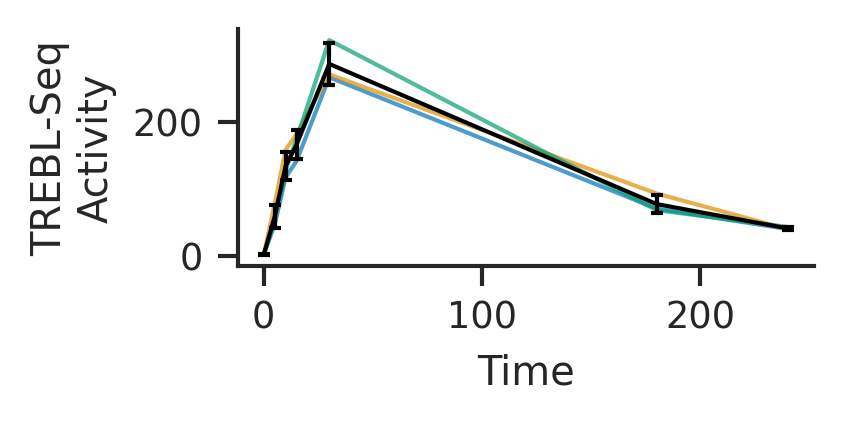

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Filtered dataframe (your existing code)
ad_df = qcdf[qcdf["Name"].str.contains("CITED2_0")]
ad_df = ad_df[ad_df["sample"] == "1"]

# Group by tile, time, and sample
ad_df = (
    ad_df.groupby(["Name", "Activity_SCglucose", "AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
         .agg(["mean", "std"])
         .reset_index()
)

# Ensure Time is numeric
ad_df["Time"] = pd.to_numeric(ad_df["Time"], errors="coerce")
ad_df = ad_df.sort_values(["Name", "Time"])
ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]

# Compute overall mean and std across tiles at each time
overall = ad_df.groupby("Time").agg(
    mean=("mean", "mean"),  # average of all tile means at this time
    std=("mean", "std")     # std of all tile means at this time
).reset_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(3, 1.5), dpi=300)

# Palette for individual AD_BC lines
names = ad_df["AD_BC"].unique()
palette_dict = dict(zip(names, sns.color_palette("colorblind", n_colors=len(names))))

# Plot individual AD_BC lines
sns.lineplot(
    data=ad_df,
    x="Time",
    y="mean",
    hue="AD_BC",
    linewidth=1,
    legend=False,
    palette=palette_dict,
    alpha=0.7,
    ax=ax
)

# Overlay overall mean with std as error bars
ax.errorbar(
    overall["Time"],
    overall["mean"],
    yerr=overall["std"],
    color="black",
    linewidth=1,
    capsize=1.5,
    label="Average ± SD"
)

ax.set_xlabel("Time")
ax.set_ylabel("TREBL-Seq\nActivity")
plt.tight_layout()
sns.despine()
plt.show()

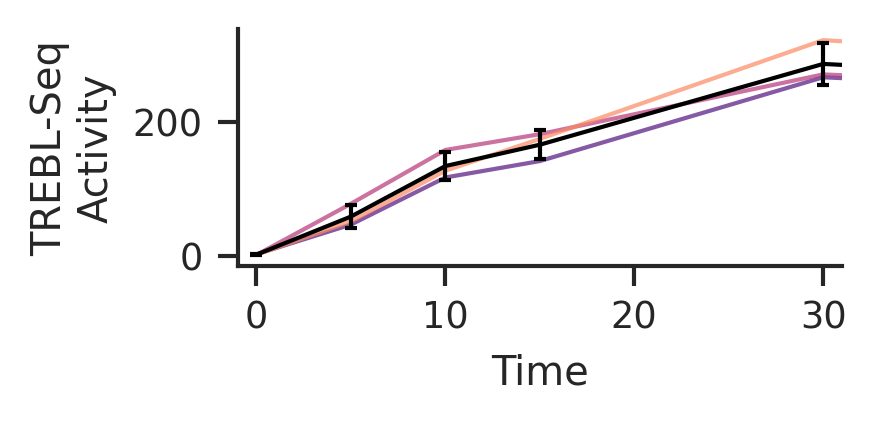

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Filtered dataframe (your existing code)
ad_df = qcdf[qcdf["Name"].str.contains("CITED2_0")]
ad_df = ad_df[ad_df["sample"] == "1"]

# Group by tile, time, and sample
ad_df = (
    ad_df.groupby(["Name", "Activity_SCglucose", "AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
         .agg(["mean", "std"])
         .reset_index()
)

# Ensure Time is numeric
ad_df["Time"] = pd.to_numeric(ad_df["Time"], errors="coerce")
ad_df = ad_df.sort_values(["Name", "Time"])
ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]

# Compute overall mean and std across tiles at each time
overall = ad_df.groupby("Time").agg(
    mean=("mean", "mean"),  # average of all tile means at this time
    std=("mean", "std")     # std of all tile means at this time
).reset_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(3, 1.5), dpi=300)

# Palette for individual AD_BC lines
names = ad_df["AD_BC"].unique()
palette_dict = dict(zip(names, sns.color_palette("magma", n_colors=len(names))))

# Plot individual AD_BC lines
sns.lineplot(
    data=ad_df,
    x="Time",
    y="mean",
    hue="AD_BC",
    linewidth=1,
    legend=False,
    palette=palette_dict,
    alpha=0.7,
    ax=ax
)

# Overlay overall mean with std as error bars
ax.errorbar(
    overall["Time"],
    overall["mean"],
    yerr=overall["std"],
    color="black",
    linewidth=1,
    capsize=1.5,
    label="Average ± SD"
)

ax.set_xlabel("Time")
ax.set_ylabel("TREBL-Seq\nActivity")
ax.set_xlim(-1,31)
plt.tight_layout()
sns.despine()
plt.savefig("../output/grant_resub_figs_v2/fig5.png", bbox_inches="tight")
plt.show()

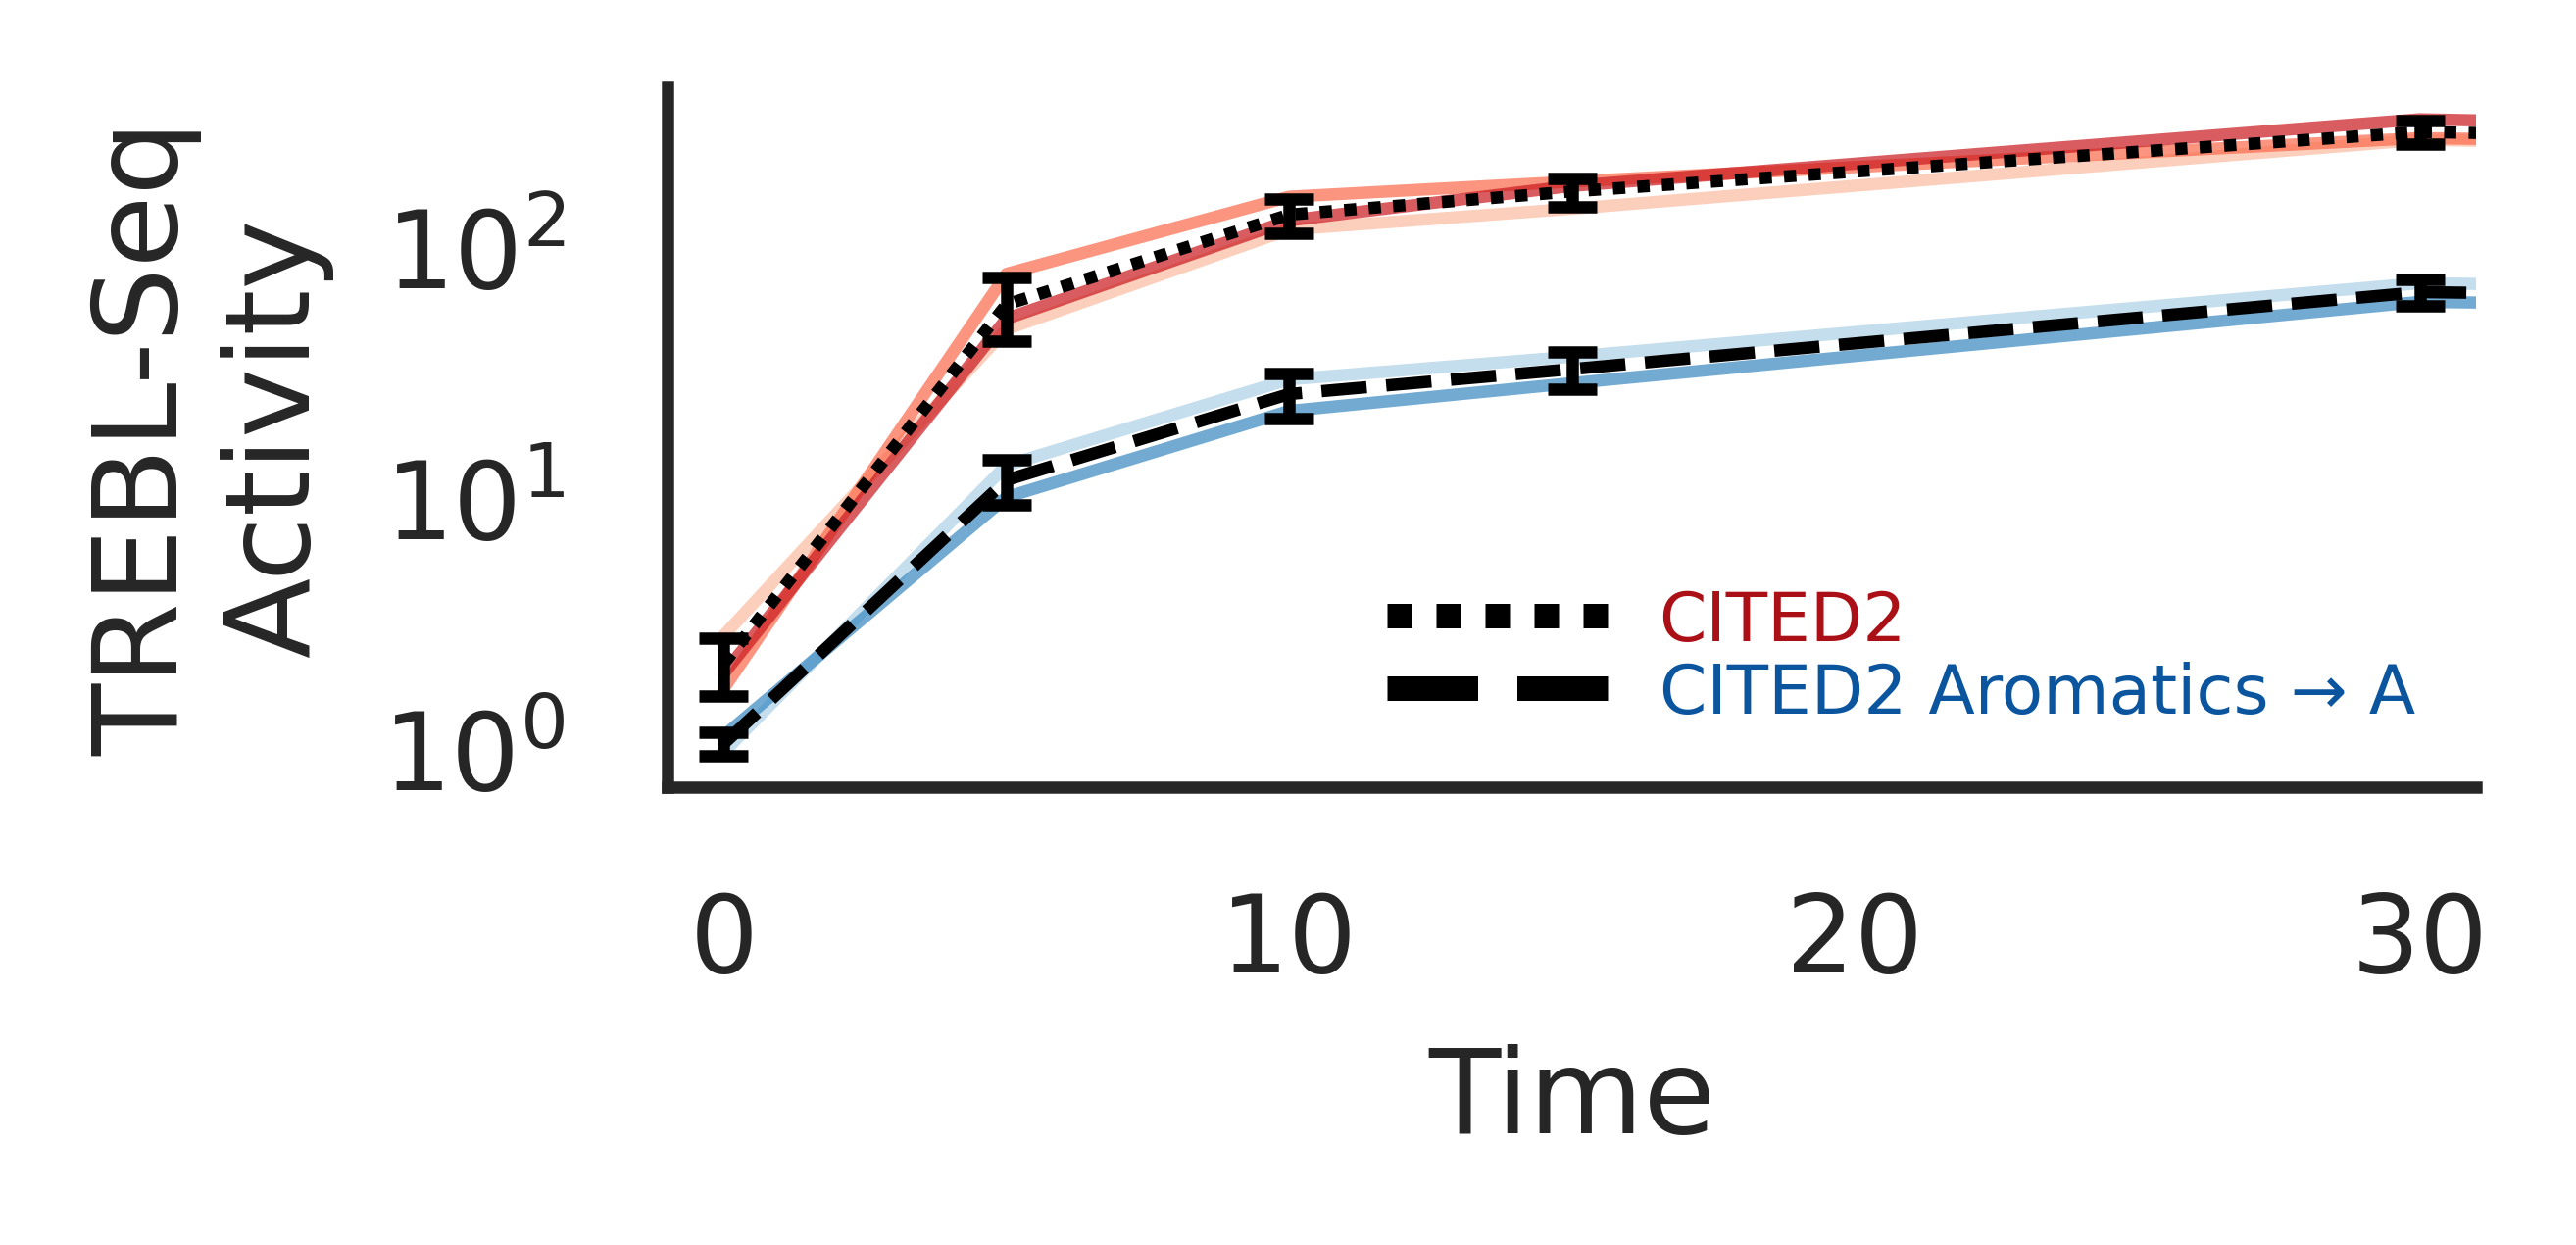

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import pandas as pd
import numpy as np

sns.set_style('white')

# Define the ADs and their line styles
ad_info = {
    "CITED2_0": {"palette": "Reds", "linestyle": (0, (1,1))},        # dotted
    "CITED2_ARO2A_0": {"palette": "Blues", "linestyle": "dashed"} # dashed
}

fig, ax = plt.subplots(figsize=(3,1.5), dpi=900)

for ad_name, props in ad_info.items():
    # Filter dataframe
    ad_df = qcdf[qcdf["Name"] == ad_name]
    ad_df = ad_df[ad_df["sample"] == "1"]
    ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]

    # Group by tile, time, AD_BC
    ad_df_grouped = (
        ad_df.groupby(["AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
             .agg(["mean", "std"])
             .reset_index()
    )

    # Ensure Time numeric
    ad_df_grouped["Time"] = pd.to_numeric(ad_df_grouped["Time"], errors="coerce")
    ad_df_grouped = ad_df_grouped.sort_values(["AD_BC", "Time"])

    # Plot individual tile lines
    names = ad_df_grouped["AD_BC"].unique()
    palette_dict = dict(zip(names, sns.color_palette(props["palette"], n_colors=len(names))))
    sns.lineplot(
        data=ad_df_grouped,
        x="Time",
        y="mean",
        hue="AD_BC",
        palette=palette_dict,
        linewidth=1,
        alpha=0.7,
        legend=False,
        ax=ax
    )

    # Compute overall mean ± std across tiles at each time
    overall = ad_df_grouped.groupby("Time").agg(
        mean=("mean", "mean"),
        std=("mean", "std")
    ).reset_index()

    # Plot overall mean ± SD with specified line style
    ax.errorbar(
        overall["Time"],
        overall["mean"],
        yerr=overall["std"],
        color="black",
        linewidth=1,
        capsize=2,
        linestyle=props["linestyle"]
    )

# Set labels, limits, log scale
ax.set_xlabel("Time")
ax.set_ylabel("TREBL-Seq\nActivity")
ax.set_xlim(-1,31)
ax.set_yscale('log')
sns.despine()
plt.tight_layout()


# Create custom legend handles
legend_handles = [
    mlines.Line2D([], [], color='black', 
                  linestyle=ad_info["CITED2_0"]["linestyle"], linewidth=2, label="CITED2"),
    mlines.Line2D([], [], color='black', 
                  linestyle=ad_info["CITED2_ARO2A_0"]["linestyle"], linewidth=2, label="CITED2 Aromatics → A")
]

# Add legend
leg = ax.legend(handles=legend_handles, 
                fontsize='xx-small', 
                frameon=False, 
                handletextpad=0.5,
               handlelength=3.5,
               labelspacing=0.1)

# Change text color individually
for text, color in zip(leg.get_texts(), [sns.color_palette('Reds')[-1], sns.color_palette('Blues')[-1]]):
    text.set_color(color)


plt.show()


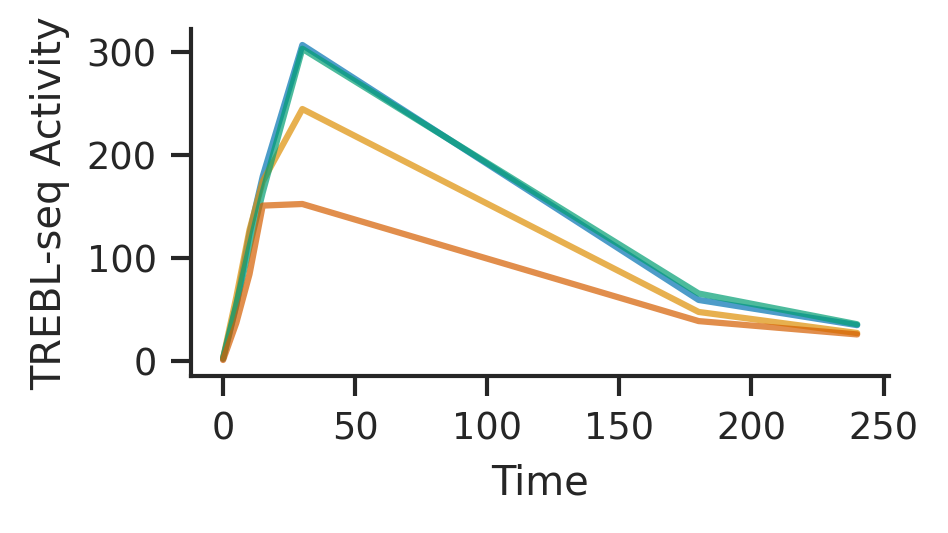

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ad_df = qcdf[qcdf["Name"].str.contains("Gnc4Lib_ChopOrthologs_HIGH_0")]
ad_df = ad_df[ad_df["sample"] == "2"]

# group by tile, time, and sample
ad_df = (
    ad_df.groupby(["Name", "Activity_SCglucose", "AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
      .agg(["mean", "std"])
      .reset_index()
)

# ensure Time is numeric
ad_df["Time"] = pd.to_numeric(ad_df["Time"], errors="coerce")
ad_df = ad_df.sort_values(["Name", "Time"])
ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(3,1.5), dpi=300)

# Create palette
names = ad_df["AD_BC"].unique()
palette_dict = dict(zip(names, sns.color_palette("colorblind", n_colors=len(names))))

# Line plot
sns.lineplot(
    data=ad_df,
    x="Time",
    y="mean",
    hue="AD_BC",
    linewidth=1.5,
    legend=False,
    palette=palette_dict,
    alpha=0.7,
    ax=ax
)

# # Your two series
# means = final_means_cat.loc[ad_df["Tile"].iloc[0]]
# stds = std_devs_cat.loc[ad_df["Tile"].iloc[0]]

# # Keep only numeric time indices
# means_numeric = means[means.index.to_series().apply(lambda x: str(x).isdigit())]
# stds_numeric = stds[stds.index.to_series().apply(lambda x: str(x).isdigit())]

# # Convert to int/float
# means_numeric.index = means_numeric.index.astype(int)
# stds_numeric.index = stds_numeric.index.astype(int)
# means_numeric = means_numeric.astype(float)
# stds_numeric = stds_numeric.astype(float)

# # Align on common timepoints
# df = pd.DataFrame({"mean": means_numeric, "std": stds_numeric}).sort_index()

# # Add error bars (overlay on same ax)
# ax.errorbar(
#     df.index,
#     df["mean"],
#     yerr=df["std"],
#     fmt="-o",
#     capsize=3,
#     linewidth=1,
#     markersize=3,
#     color="black"  # or pick from palette_dict if you want it matching
# )

# Labels and style
ax.set_ylabel("TREBL-seq Activity")
#ax.set_title("CITED2", y=0.9)
sns.despine()
#ax.set_ylim(0, None)
# ax.set_xlim(-1,31)
# ax.set_yscale('log')

#plt.savefig("grant_resub_figs/fig5.png", bbox_inches="tight")
plt.show()

# Figure 6: allelic series

In [551]:
gcn4_design = pd.read_csv("../data/Gcn4Array_Design.csv")
gcn4_design_vars = gcn4_design[(gcn4_design["Name"].str.contains("GCN4alt"))].drop_duplicates(subset = "ADseq")
gcn4_design_vars

,Unnamed: 0,ADseq,Name,ArrayDNA
20687,8,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,GCN4alt_0,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...
20688,9,DDAVVESAASSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,GCN4alt_FF_AA_0,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...
20689,10,DDAVVESFFSSSTDSTPAAEAENAEDNSKEWTSLFDNDIP,GCN4alt_MFYL_A_0,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...
20690,11,DDAVVESFFSSSTDSTPMFEYENLEDNSKEATSAADNDIP,GCN4alt_WLF_A_0,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...
20691,12,DDAVVESAASSSTDSTPAAEAENAEDNSKEATSAADNDIP,GCN4alt_ALLAS_0,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...
20692,13,DDAVVESAASSSTDSTPMAEAENLEDNSKEATSLADNDIP,GCN4alt_ARO_A_0,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...
20693,14,DDAVVESFFSSSTDSTPMFEYENAEDNSKEWTSAFDNDIP,GCN4alt_L_A_0,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...


In [552]:
names = ["GCN4alt_0", "GCN4alt_ARO_A_0", "GCN4alt_FF_AA_0", "GCN4alt_MFYL_A_0", "GCN4alt_WLF_A_0"]

In [553]:
#gcn4_comparison = qcdf[qcdf["Name"].isin(gcn4_design_vars["Name"])]
gcn4_comparison = qcdf[qcdf["Name"].isin(names)]
gcn4_comparison

,Tile,AD_BC,RPTR_BC,RPTR_UMIs,AD_UMIs,Ratio_negCTRLnorm,Time,sample,Name,is_control,GFP_mean,mCherry_mean,Activity_SCglucose
173,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,ATTTTTGGATT,TAAGTTGCCTGTAG,165,479,3.128311,5,3,GCN4alt_WLF_A_0,low,2497.083969,3447.610479,32126.202553
2303,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,GTCACCTTTTG,CAACTATACATACC,3412,373,83.073345,5,3,GCN4alt_0,high,8606.639029,3138.089823,258453.390222
4540,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,GATACCTTAGA,TCGAACCATTCATT,120,1586,0.687131,5,3,GCN4alt_ARO_A_0,low,270.500000,3714.398437,13761.263345
6924,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,ATTTTTGGATT,TAAGTTGCCTGTAG,156,634,2.646424,5,1,GCN4alt_WLF_A_0,low,2497.083969,3447.610479,32126.202553
8583,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,GTCACCTTTTG,CAACTATACATACC,3497,495,75.982670,5,1,GCN4alt_0,high,8606.639029,3138.089823,258453.390222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115072,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,ATTTTTGGATT,TAAGTTGCCTGTAG,921,644,4.102879,180,2,GCN4alt_WLF_A_0,low,2497.083969,3447.610479,32126.202553
116620,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,GATACCTTAGA,TCGAACCATTCATT,249,1595,0.447872,180,2,GCN4alt_ARO_A_0,low,270.500000,3714.398437,13761.263345
118243,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,ATTTTTGGATT,TAAGTTGCCTGTAG,944,720,3.305916,240,1,GCN4alt_WLF_A_0,low,2497.083969,3447.610479,32126.202553
119974,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,GTCACCTTTTG,CAACTATACATACC,4118,556,18.675138,240,1,GCN4alt_0,high,8606.639029,3138.089823,258453.390222


In [554]:
# group by tile, time, and sample
agg_df = (
    gcn4_comparison.groupby(["Name", "Activity_SCglucose", "Tile", "Time"])["Ratio_negCTRLnorm"]
      .agg(["mean", "std"])
      .reset_index()
)
agg_df

,Name,Activity_SCglucose,Tile,Time,mean,std
0,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,0,4.315016,0.480951
1,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,10,126.247939,15.041298
2,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,15,182.989983,12.723474
3,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,180,29.130946,6.388928
4,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,240,16.771738,3.940558
5,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,30,256.456633,35.633499
6,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,5,74.563962,9.300250
7,GCN4alt_ARO_A_0,13761.263345,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,0,0.531558,0.206364
8,GCN4alt_ARO_A_0,13761.263345,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,10,0.635939,0.036218
9,GCN4alt_ARO_A_0,13761.263345,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,15,0.583853,0.064678


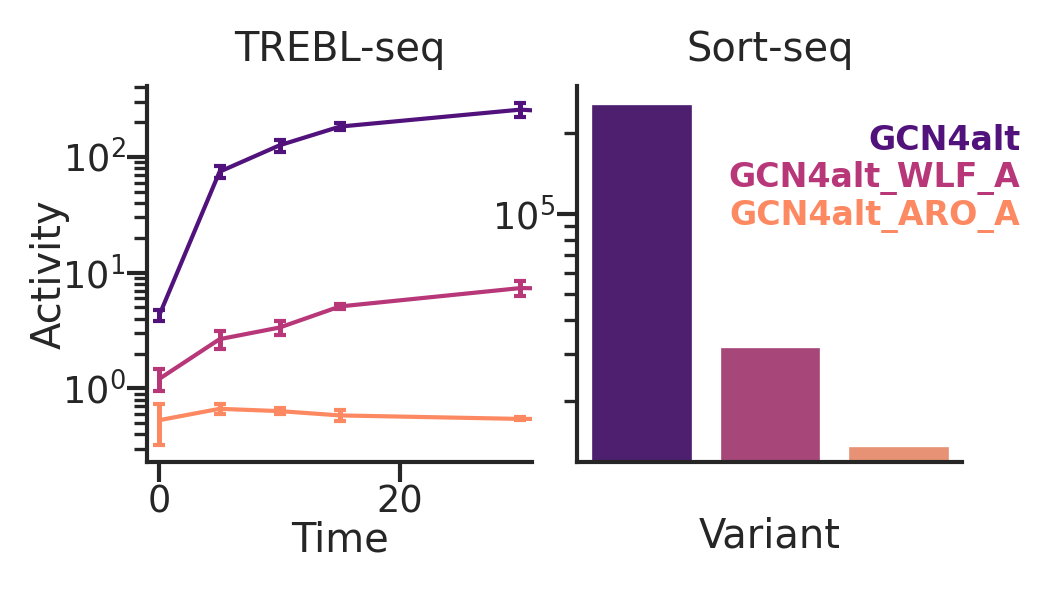

In [562]:
sns.set_style('ticks')
sns.set_context('paper')
# ensure Time is numeric
agg_df["Time"] = pd.to_numeric(agg_df["Time"], errors="coerce")
agg_df = agg_df.sort_values(["Name", "Time"])

# ----- create palette ordered by decreasing activity -----
# get mean activity for each Name (or first measurement, as in your bar plot)
activity_order = agg_df.groupby("Name")["Activity_SCglucose"].first().sort_values(ascending=False)
names_sorted = activity_order.index.tolist()

# create palette in the same order
palette = dict(zip(names_sorted, sns.color_palette("magma", n_colors=len(names_sorted))))


# create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(3,1.5), dpi =300)

# ----- subplot 1: line plot with error bars -----
ax = axes[0]
sns.lineplot(
    data=agg_df,
    x="Time",
    y="mean",
    hue="Name",
    linewidth=1,
    ax=ax,
    legend=False,         # remove legend here
    markeredgecolor=None, # remove marker edge
    palette=palette
)

# add error bars
for name, sub in agg_df.groupby("Name"):
    ax.errorbar(
        sub["Time"],
        sub["mean"],
        yerr=sub["std"],
        fmt="none",
        capsize=1.5,
        color=palette[name]
    )

ax.set_yscale("log")
ax.set_xlabel("Time", labelpad = 0)
ax.set_ylabel("Activity", labelpad = -2)
ax.tick_params(axis='both')
sns.despine(ax=ax)
ax.set_title("TREBL-seq")
ax.set_xlim(-1, 31)

# ----- subplot 2: bar plot sorted decreasing -----
ax2 = axes[1]
activity_df = agg_df.groupby("Name")["Activity_SCglucose"].first().sort_values(ascending=False).reset_index()

sns.barplot(
    data=activity_df,
    x="Name",
    y="Activity_SCglucose",
    ax=ax2,
    palette={name: palette[name] for name in activity_df["Name"]},
    dodge=False
)

ax2.set_yscale("log")
ax2.set_xlabel("Variant",labelpad = 13)
ax2.set_ylabel("")
ax2.tick_params(axis='y')
ax2.set_xticks([])  # hide x-axis ticks since we have legend text
sns.despine(ax=ax2)
ax2.set_title("Sort-seq")

# ----- custom legend as colored text (top-right of ax2) -----
for i, name in enumerate(activity_df["Name"]):
    ax2.text(
        1.15, 0.9 - i*0.1,     # x slightly outside, y decreasing
        name[:-2],
        color=palette[name],
        transform=ax2.transAxes,
        fontsize='small',
        va='top',
        ha = 'right',
        fontweight = 'bold'
    )

#ax.set_ylim(None, 950)

# Subplot 1: line plot
ax.tick_params(axis='x', pad=0.5)  # bring x-axis labels closer
ax.tick_params(axis='y', pad=0.5)  # bring y-axis labels closer

# Subplot 2: bar plot
ax2.tick_params(axis='y', pad=0.5)  # y-axis only, x labels hidden

plt.tight_layout(pad = -1)
plt.savefig("../output/grant_resub_figs_v2/fig6.png", dpi=300, bbox_inches="tight")
plt.show()

# Figure 8: Speed vs strength

In [490]:
cols_ordered = final_means_cat.iloc[:, :-3].reindex(sorted(final_means_cat.iloc[:, :-3].columns, key=lambda x: float(x)), axis=1)
cols_ordered

Time,0,5,10,15,30,180,240
Tile,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.351119,1.062693,1.532920,1.787659,1.240728,1.206545
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,2.077828,1.819540,1.700459,1.885667,2.317024,2.080985
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.621634,1.000460,0.730895,0.797948,0.709995,0.732983
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,0.934068,1.299895,1.467031,1.947597,1.668606,1.693269
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,0.959878,1.127691,1.071415,1.427080,1.504457,1.322705
...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,10.208349,18.108378,25.314241,38.055564,15.885584,11.023455
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,16.050106,30.615512,26.635877,73.708402,24.434864,17.924639
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,6.746955,14.324264,20.019784,42.340589,19.689651,12.861237


In [493]:
linear_t_half = kinetics_analysis.analyze_tiles_lin_parallel(cols_ordered, max_workers = 32)
linear_t_half = pd.concat(linear_t_half)
linear_t_half

 Number of decreasing tiles 0
Increasing dfs:10934
Total dfs:10934


Processing tiles (linear): 100%|██████████| 10934/10934 [00:02<00:00, 5328.75it/s]


,T1/2,0,5,10,15,30,180,240
Tile,,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,14.872564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAGCTGCTTTGTCTAAATCTACTCCACCACAATTGAGAAGATTGTTTATGTCTCATTCTGCTGCTGCTCCAAACTTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACATTCTACTGTTGCTGGTGTTAATGCTAGACAAAGGAAACCATTGCCACCAATTAAAGTTGATCCATCTGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGGAAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACATGCTTCTCCAGCTGTTCAGAATCAAAGAGTTGCTCAAATCTTGCAAGCTATTGGTCATCCAGCTTTGTCTTCTGCTTATGGTAATAGATTGTCTAATCAATTCTATGCTTCTTCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
TTTGGTTCTGGATTTGATGTTTCTCCAAACTTTGCTGGTTCTGACTTTGATGCTGGTGGTAATGATGTTTGGTTTCCATTGTTTCCACAATCTAATACTCAACAGAATGCTAATGTTGAA,18.220571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATAGATCTGCTTCTTCTCCAGCTACTGCTGCTGTTTCTGCATTTGGTTCTTTGCATAATCATAATGCTTCTACTAGA,14.533146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,16.438976,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [492]:
linear_slope_intercept = kinetics_analysis.analyze_tiles_parallel_slope_intercept(cols_ordered, max_workers = 32)
linear_slope_intercept

 Number of decreasing tiles 0
Increasing dfs:10934
Total dfs:10934


Processing tiles: 100%|██████████| 10934/10934 [00:02<00:00, 4602.59it/s]


,Slope,Intercept
Tile,,
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,0.000000,1.984682
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,0.091001,1.166629
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,0.003537,1.702894
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,0.019137,1.168071
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.003116,1.003739
...,...,...
TTTGTTCCAGCTGCTTATCATTATCCAGCTCCACCACCAATGATGCCACAACAAACTTGGGCTTCTTATAATCCAGTTGTTTCTAATAATGCTTCTGCTTCTGAAGTTAGAGGTGTTCCA,0.010667,1.047169
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,2.288599,2.274113
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.363273,0.723353


In [495]:
final_means_cat = pd.merge(final_means_cat, linear_t_half[["T1/2"]], left_index = True, right_index=True, how = 'left')
final_means_cat

,0,10,15,180,240,30,5,Vmax,Avg_StdDev,Activity,T1/2
Tile,,,,,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.062693,1.532920,1.240728,1.206545,1.787659,1.351119,1.787659,0.431083,inactive,14.872564
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,1.819540,1.700459,2.317024,2.080985,1.885667,2.077828,2.317024,0.356520,inactive,3.236422
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.000460,0.730895,0.709995,0.732983,0.797948,1.621634,1.621634,0.269212,inactive,2.500000
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,1.299895,1.467031,1.668606,1.693269,1.947597,0.934068,1.984682,0.981397,inactive,NaN
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,1.127691,1.071415,1.504457,1.322705,1.427080,0.959878,1.504457,0.396125,inactive,8.940911
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349,38.055564,2.313608,active,11.027974
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106,73.708402,6.074092,active,18.523277
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,14.324264,20.019784,19.689651,12.861237,42.340589,6.746955,42.340589,2.990464,active,16.438976


In [496]:
final_means_cat = pd.merge(final_means_cat, linear_slope_intercept[["Slope", "Intercept"]], left_index = True, right_index=True, how = 'left')
final_means_cat

,0,10,15,180,240,30,5,Vmax,Avg_StdDev,Activity,T1/2,Slope,Intercept
Tile,,,,,,,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.062693,1.532920,1.240728,1.206545,1.787659,1.351119,1.787659,0.431083,inactive,14.872564,0.019137,1.168071
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,1.819540,1.700459,2.317024,2.080985,1.885667,2.077828,2.317024,0.356520,inactive,3.236422,0.003537,1.702894
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.000460,0.730895,0.709995,0.732983,0.797948,1.621634,1.621634,0.269212,inactive,2.500000,0.091001,1.166629
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,1.299895,1.467031,1.668606,1.693269,1.947597,0.934068,1.984682,0.981397,inactive,NaN,0.000000,1.984682
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,1.127691,1.071415,1.504457,1.322705,1.427080,0.959878,1.504457,0.396125,inactive,8.940911,0.003116,1.003739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349,38.055564,2.313608,active,11.027974,1.207128,4.076608
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106,73.708402,6.074092,active,18.523277,2.288599,2.274113
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,14.324264,20.019784,19.689651,12.861237,42.340589,6.746955,42.340589,2.990464,active,16.438976,1.363273,0.723353


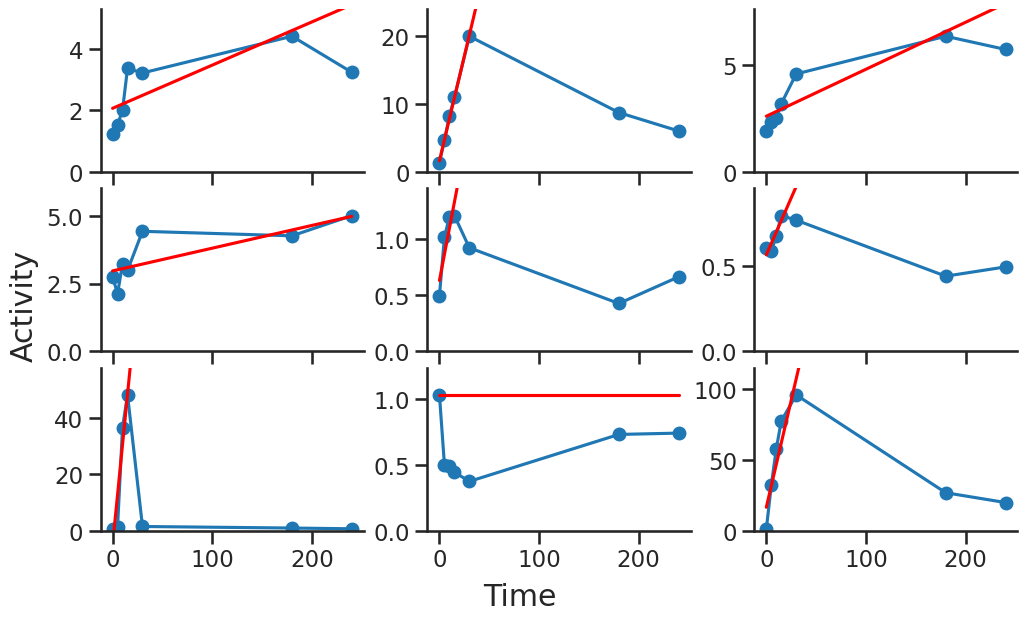

In [549]:
# Define time points (column names that are numeric)
time_cols = ['0', '5', '10', '15', '30', '180', '240']
time_points = np.array(time_cols, dtype=float)

# Sample 9 random rows
sample_rows = final_means_cat.sample(9)

sns.set_context('talk')
# Create 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(10,6), sharex = True)
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_rows.iterrows()):
    tile_name = row.name
    activity = row[time_cols].values.flatten()
    slope = row['Slope']
    intercept = row['Intercept']
    fit_line = slope * time_points + intercept

    # Plot observed and fit
    ax.plot(time_points, activity, 'o-', label='Observed')
    ax.plot(time_points, fit_line, 'r-', label='Fit')
    #ax.set_title(tile_name, fontsize=10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Activity')
    ax.set_ylim(0, max(activity) * 1.2)
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.supxlabel("Time", y = -0.01)
fig.supylabel("Activity", x = -0.01)

sns.despine()
plt.tight_layout(pad=0.1)
plt.show()

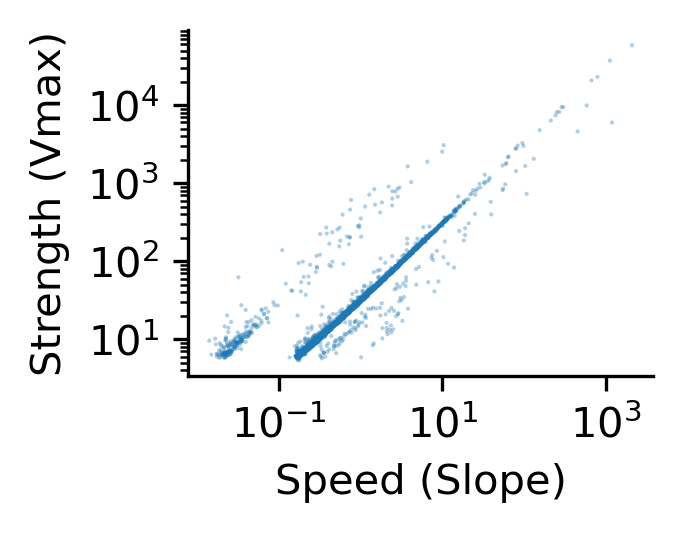

In [498]:
## ACTIVE TILES ONLY
plt.figure(dpi = 300, figsize= (2,1.5))
ax = sns.scatterplot(data=final_means_cat[final_means_cat["Activity"] == "active"], 
                     x = "Slope", y = "Vmax", alpha=0.35, s=1, edgecolor = 'none')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Speed (Slope)")
ax.set_ylabel("Strength (Vmax)")
sns.despine()
# plt.savefig("grant_resub_figs/fig8.png", dpi=300, bbox_inches="tight")

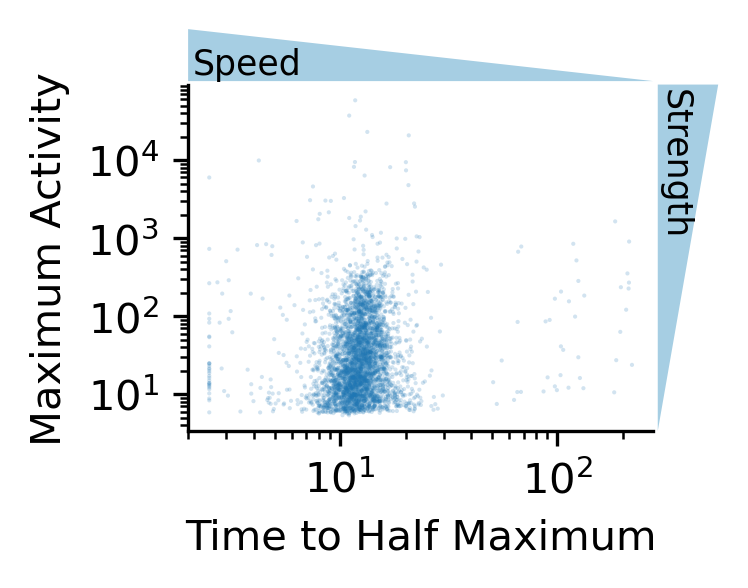

In [499]:
import matplotlib.patches as patches


blue_color = sns.color_palette('Paired')[0]

plt.figure(figsize=(2,1.5), dpi = 300)
ax = sns.scatterplot(
    data=final_means_cat[final_means_cat["Activity"] == "active"], 
    x="T1/2", y="Vmax", alpha=0.2, s=1, edgecolor='none'
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Time to Half Maximum")
ax.set_ylabel("Maximum Activity")

# --- Add big ramp triangles ---
# Top ramp (Strength ↑)
strength_ramp = patches.Polygon(
    [[0, 1.01], [1, 1.01], [0, 1.16]],   # x,y in axes coords
    transform=ax.transAxes, clip_on=False,
    facecolor=blue_color, alpha=1, edgecolor="none"
)
ax.add_patch(strength_ramp)
ax.text(0.01, 1.06, "Speed", transform=ax.transAxes,
        ha="left", va="center", fontsize='small')

# Right ramp (Speed ↑, since x is inverted)
speed_ramp = patches.Polygon(
    [[1.01, 0], [1.14, 1], [1.01, 1]],   # x,y in axes coords
    transform=ax.transAxes, clip_on=False,
    facecolor=blue_color, alpha=1, edgecolor="none"
)
ax.add_patch(speed_ramp)
ax.text(1.01, 0.99, "Strength", transform=ax.transAxes,
        ha="left", va="top", fontsize='small', rotation=-90)

sns.despine()
plt.savefig("../output/grant_resub_figs_v2/fig8.png", dpi=300, bbox_inches="tight")


In [374]:
# ## ACTIVE TILES ONLY
# plt.figure(dpi = 300, figsize= (2,1.5))
# ax = sns.scatterplot(data=final_means_cat, 
#                      x = "T1/2", y = "Vmax", alpha=0.15, s=1, edgecolor = 'none')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel("Speed (T1/2)")
# ax.set_ylabel("Strength (Vmax)")
# ax.invert_xaxis()
# sns.despine()
# #plt.savefig("grant_resub_figs/fig8.png", dpi=300, bbox_inches="tight")

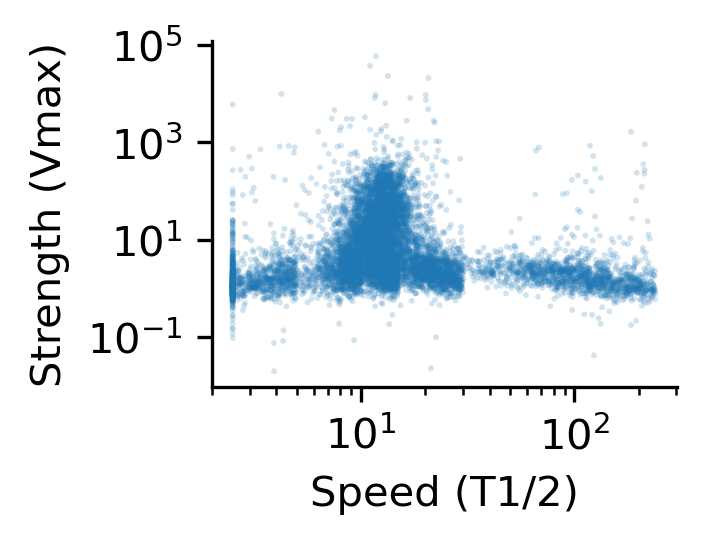

In [429]:
## ACTIVE AND INACTIVE TILES
plt.figure(dpi = 300, figsize= (2,1.5))
ax = sns.scatterplot(data=final_means_cat, 
                     x = "T1/2", y = "Vmax", alpha=0.2, s=2, edgecolor = 'none')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Speed (T1/2)")
ax.set_ylabel("Strength (Vmax)")
sns.despine()
